In [1]:
import numpy as np
import keras
import keras.utils as image
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Input,Dropout
from keras.models import Model
from keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

In [2]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=50,
    rescale=1./255  
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
training_set=train_datagen.flow_from_directory(r"F:\VIT classes materials\Sem 6\Deep Learning\Project\Dataset\training",target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True)
testing_set=test_datagen.flow_from_directory(r"F:\VIT classes materials\Sem 6\Deep Learning\Project\Dataset\testing",target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=False)

Found 1739 images belonging to 4 classes.
Found 444 images belonging to 4 classes.


In [4]:
training_set.class_indices

{'1-Minor': 0, '2-Moderate': 1, '3-Severe': 2, '4-Good': 3}

In [5]:
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)


2.16.1
3.1.1


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base MobileNetV2 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
x = Conv2D(64, (3, 3), activation='relu', padding='same')(base_model.output)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,267,588 (12.46 MB)

 Trainable params: 1,009,604 (3.85 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:

# callback=keras.callbacks.EarlyStopping(
#     monitor='val_accuracy',
#     min_delta=0.001,
#     patience=10,
#     verbose=1,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False,
# )

# from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model_weights_Inception.weights.h5', 
                             monitor='val_accuracy',  # Monitor validation accuracy
                             verbose=1, 
                             save_best_only=True,  # Save only the best model
                             mode='max',  # Save when the monitored quantity is maximized (e.g., validation accuracy)
                             save_weights_only=True)  # Save only the model weights

# Example: Training the model with the fit method
history = model.fit(training_set ,
                    epochs=50, 
                    validation_data=testing_set,
                    callbacks=[checkpoint])  # Pass the checkpoint callback to the fit method


# history = model.fit(training_set,epochs=50,validation_data=testing_set)

Epoch 1/50


c:\Users\Tushar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.3496 - loss: 1.5118
Epoch 1: val_accuracy improved from -inf to 0.62838, saving model to best_model_weights_Inception.weights.h5
55/55 ━━━━━━━━━━━━━━━━━━━━ 51s 815ms/step - accuracy: 0.3514 - loss: 1.5068 - val_accuracy: 0.6284 - val_loss: 0.8919
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.5497 - loss: 1.0222
Epoch 2: val_accuracy improved from 0.62838 to 0.66441, saving model to best_model_weights_Inception.weights.h5
55/55 ━━━━━━━━━━━━━━━━━━━━ 43s 742ms/step - accuracy: 0.5499 - loss: 1.0218 - val_accuracy: 0.6644 - val_loss: 0.8545
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.6109 - loss: 0.9387
Epoch 3: val_accuracy did not improve from 0.66441
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 645ms/step - accuracy: 0.6111 - loss: 0.9380 - val_accuracy: 0.6284 - val_loss: 0.8275
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.6210 - loss: 0.8720
Epoch 4: val_accuracy did not improve fro

In [9]:
history1 = model.fit(training_set ,
                    initial_epoch=50,
                    epochs=75, 
                    validation_data=testing_set,
                    callbacks=[checkpoint])  # Pass the checkpoint callback to the fit method

Epoch 51/75
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.7372 - loss: 0.6009
Epoch 51: val_accuracy did not improve from 0.75901
55/55 ━━━━━━━━━━━━━━━━━━━━ 46s 796ms/step - accuracy: 0.7372 - loss: 0.6011 - val_accuracy: 0.7162 - val_loss: 0.6455
Epoch 52/75
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.7414 - loss: 0.5963
Epoch 52: val_accuracy did not improve from 0.75901
55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 839ms/step - accuracy: 0.7414 - loss: 0.5962 - val_accuracy: 0.7230 - val_loss: 0.6884
Epoch 53/75
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.7537 - loss: 0.5694
Epoch 53: val_accuracy did not improve from 0.75901
55/55 ━━━━━━━━━━━━━━━━━━━━ 45s 783ms/step - accuracy: 0.7534 - loss: 0.5701 - val_accuracy: 0.7050 - val_loss: 0.6835
Epoch 54/75
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.7259 - loss: 0.6458
Epoch 54: val_accuracy did not improve from 0.75901
55/55 ━━━━━━━━━━━━━━━━━━━━ 46s 784ms/step - accuracy: 0.7260 - loss: 0.6458 - val_accuracy

In [10]:
history2 = model.fit(training_set ,
                    initial_epoch=75,
                    epochs=100, 
                    validation_data=testing_set,
                    callbacks=[checkpoint])  # Pass the checkpoint callback to the fit method

Epoch 76/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.7528 - loss: 0.5748
Epoch 76: val_accuracy did not improve from 0.75901
55/55 ━━━━━━━━━━━━━━━━━━━━ 43s 736ms/step - accuracy: 0.7528 - loss: 0.5751 - val_accuracy: 0.7342 - val_loss: 0.6268
Epoch 77/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.7663 - loss: 0.5402
Epoch 77: val_accuracy did not improve from 0.75901
55/55 ━━━━━━━━━━━━━━━━━━━━ 45s 775ms/step - accuracy: 0.7663 - loss: 0.5404 - val_accuracy: 0.7477 - val_loss: 0.6620
Epoch 78/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.7861 - loss: 0.5371
Epoch 78: val_accuracy did not improve from 0.75901
55/55 ━━━━━━━━━━━━━━━━━━━━ 47s 812ms/step - accuracy: 0.7857 - loss: 0.5380 - val_accuracy: 0.7320 - val_loss: 0.7187
Epoch 79/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.7457 - loss: 0.5874
Epoch 79: val_accuracy did not improve from 0.75901
55/55 ━━━━━━━━━━━━━━━━━━━━ 50s 862ms/step - accuracy: 0.7457 - loss: 0.5874 - val_accu

In [11]:
model.save('MobileNet_model.h5')

In [12]:
model.save("MobileNet_Model_Final.keras")

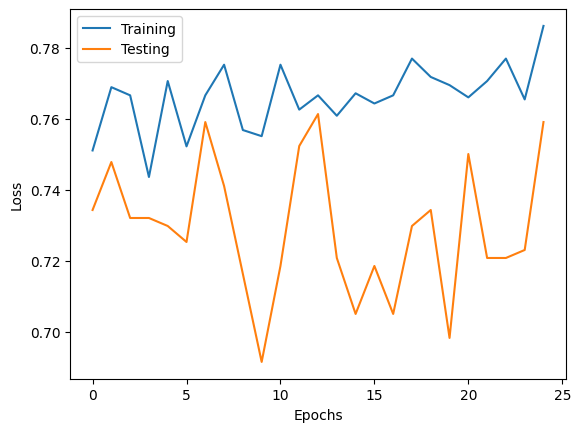

In [13]:
plt.plot(history2.history['accuracy'],label='Training')
plt.plot(history2.history['val_accuracy'],label='Testing')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

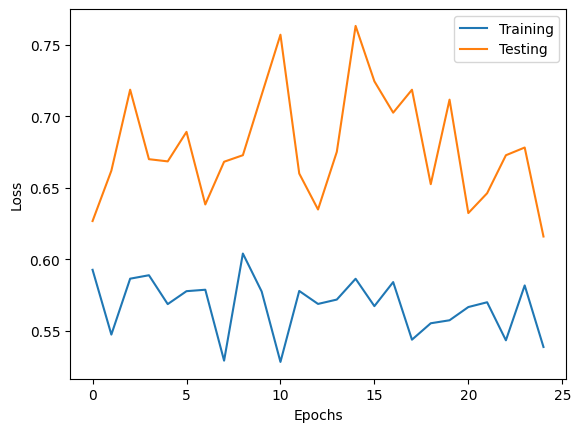

In [14]:
plt.plot(history2.history['loss'],label='Training')
plt.plot(history2.history['val_loss'],label='Testing')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# import pickle 
# with open('RESNET_Model_New_1_2.pkl','wb') as f:
#     pickle.dump(model,f)

In [15]:
test_loss, test_accuracy = model.evaluate(testing_set)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.7081 - loss: 0.6744
Test Accuracy: 75.90%
Test Loss: 0.6160


In [16]:
predictions = model.predict(testing_set)
predicted_labels = np.argmax(predictions, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 462ms/step


<Axes: >

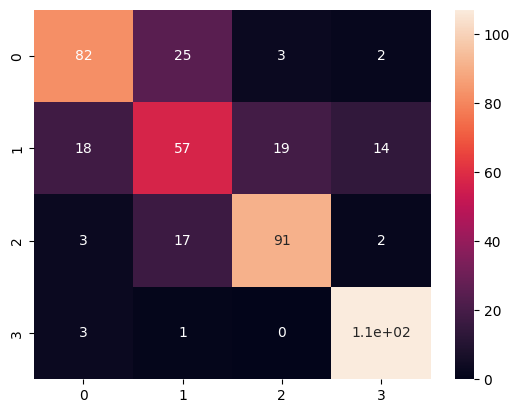

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
true_labels = testing_set.classes
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True)

In [18]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       112
           1       0.57      0.53      0.55       108
           2       0.81      0.81      0.81       113
           3       0.86      0.96      0.91       111

    accuracy                           0.76       444
   macro avg       0.75      0.76      0.75       444
weighted avg       0.75      0.76      0.75       444



In [19]:
import pickle 
img=image.load_img(r"C:\Users\Tushar\Downloads\2023-audi-r8-gt-rear-three-quarters-motion-1664827983.jpg",target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
output=np.argmax(model.predict(img_data),axis=1)
index=['1-Minor', '2-Moderate', '3-Severe', '4-Good']
result=str(index[output[0]])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'4-Good'

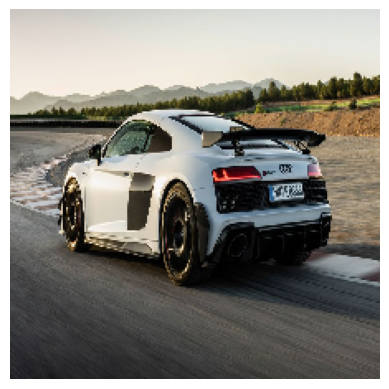

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the image
img_path = r"C:\Users\Tushar\Downloads\2023-audi-r8-gt-rear-three-quarters-motion-1664827983.jpg"
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()
